In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string


from tqdm import tqdm
import os
from collections import Counter
tit= sns.load_dataset("titanic")


In [2]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
tit['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [4]:
# train test split

from sklearn.model_selection import train_test_split
X_1, X_test, y_1, y_test = train_test_split(tit, tit['alive'], test_size=0.3, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.3)

In [5]:
my_counter = Counter()
for classs in tit['class'].values:
    classs = str(classs)
    my_counter.update(classs.split())
classs_dict = dict(my_counter)
sorted_classs_dict = dict(sorted(classs_dict.items(), key=lambda kv: kv[1]))
vectorizer_classs = CountVectorizer(vocabulary=list(sorted_classs_dict.keys()), lowercase=False, binary=True)
vectorizer_classs.fit(X_train['class'].values.astype("U"))
classs_one_hot_train = vectorizer_classs.transform(X_train['class'].values.astype("U"))
classs_one_hot_test = vectorizer_classs.transform(X_test['class'].values.astype("U"))
classs_one_hot_cv = vectorizer_classs.transform(X_cv['class'].values.astype("U"))

print(vectorizer_classs.get_feature_names())

print("Shape of matrix after one hot encoding ",classs_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",classs_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",classs_one_hot_cv.shape)

['Second', 'First', 'Third']
Shape of matrix after one hot encoding  (436, 3)
Shape of matrix after one hot encoding  (268, 3)
Shape of matrix after one hot encoding  (187, 3)


In [6]:
my_counter = Counter()
for whos in tit['who'].values:
    whos = str(whos)
    my_counter.update(whos.split())
whos_dict = dict(my_counter)
sorted_whos_dict = dict(sorted(whos_dict.items(), key=lambda kv: kv[1]))
vectorizer_whos = CountVectorizer(vocabulary=list(sorted_whos_dict.keys()), lowercase=False, binary=True)
vectorizer_whos.fit(X_train['who'].values.astype("U"))
whos_one_hot_train = vectorizer_whos.transform(X_train['who'].values.astype("U"))
whos_one_hot_test = vectorizer_whos.transform(X_test['who'].values.astype("U"))
whos_one_hot_cv = vectorizer_whos.transform(X_cv['who'].values.astype("U"))

print(vectorizer_whos.get_feature_names())

print("Shape of matrix after one hot encoding ",whos_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",whos_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",whos_one_hot_cv.shape)

['child', 'woman', 'man']
Shape of matrix after one hot encoding  (436, 3)
Shape of matrix after one hot encoding  (268, 3)
Shape of matrix after one hot encoding  (187, 3)


In [7]:
my_counter = Counter()
for adult_males in tit['adult_male'].values:
    adult_males = str(adult_males)
    my_counter.update(adult_males.split())
adult_males_dict = dict(my_counter)
sorted_adult_males_dict = dict(sorted(adult_males_dict.items(), key=lambda kv: kv[1]))
vectorizer_adult_males = CountVectorizer(vocabulary=list(sorted_adult_males_dict.keys()), lowercase=False, binary=True)
vectorizer_adult_males.fit(X_train['adult_male'].values.astype("U"))
adult_males_one_hot_train = vectorizer_adult_males.transform(X_train['adult_male'].values.astype("U"))
adult_males_one_hot_test = vectorizer_adult_males.transform(X_test['adult_male'].values.astype("U"))
adult_males_one_hot_cv = vectorizer_adult_males.transform(X_cv['adult_male'].values.astype("U"))

print(vectorizer_adult_males.get_feature_names())

print("Shape of matrix after one hot encoding ",adult_males_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",adult_males_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",adult_males_one_hot_cv.shape)

['False', 'True']
Shape of matrix after one hot encoding  (436, 2)
Shape of matrix after one hot encoding  (268, 2)
Shape of matrix after one hot encoding  (187, 2)


In [8]:
my_counter = Counter()
for decks in tit['deck'].values:
    decks = str(decks)
    my_counter.update(decks.split())
decks_dict = dict(my_counter)
sorted_decks_dict = dict(sorted(decks_dict.items(), key=lambda kv: kv[1]))
vectorizer_decks = CountVectorizer(vocabulary=list(sorted_decks_dict.keys()), lowercase=False, binary=True)
vectorizer_decks.fit(X_train['deck'].values.astype("U"))
decks_one_hot_train = vectorizer_decks.transform(X_train['deck'].values.astype("U"))
decks_one_hot_test = vectorizer_decks.transform(X_test['deck'].values.astype("U"))
decks_one_hot_cv = vectorizer_decks.transform(X_cv['deck'].values.astype("U"))

print(vectorizer_decks.get_feature_names())

print("Shape of matrix after one hot encoding ",decks_one_hot_train.shape)
print("Shape of matrix after one hot encoding ",decks_one_hot_test.shape)
print("Shape of matrix after one hot encoding ",decks_one_hot_cv.shape)

['G', 'F', 'A', 'E', 'D', 'B', 'C', 'nan']
Shape of matrix after one hot encoding  (436, 8)
Shape of matrix after one hot encoding  (268, 8)
Shape of matrix after one hot encoding  (187, 8)


In [9]:
tit.drop(['pclass'], axis=1, inplace=True)

In [10]:
tit.drop(['survived'], axis=1, inplace=True)

In [11]:
tit.head()

,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['fare'].values.reshape(-1,1))
fare_train = normalizer.transform(X_train['fare'].values.reshape(-1,1))
fare_cv = normalizer.transform(X_cv['fare'].values.reshape(-1,1))
fare_test = normalizer.transform(X_test['fare'].values.reshape(-1,1))
print("After vectorizations")
print(fare_train.shape, y_train.shape)
print(fare_cv.shape, y_cv.shape)
print(fare_test.shape, y_test.shape)
print("="*100)

After vectorizations
(436, 1) (436,)
(187, 1) (187,)
(268, 1) (268,)


In [13]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr = hstack((classs_one_hot_train,whos_one_hot_train,adult_males_one_hot_train,fare_train,decks_one_hot_train)).tocsr()
X_te = hstack((classs_one_hot_test,whos_one_hot_test,adult_males_one_hot_test,fare_test,decks_one_hot_test)).tocsr()
X_cr = hstack((classs_one_hot_cv,whos_one_hot_cv,adult_males_one_hot_cv,fare_cv,decks_one_hot_cv)).tocsr()

In [24]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


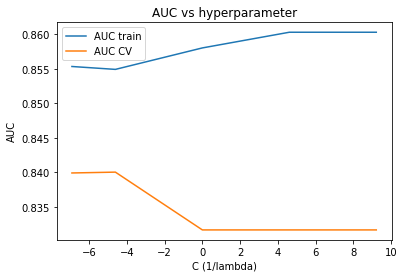

optimal lambda for which auc is maximum :  99.0


In [33]:
C = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l1',C=c)
    lr.fit(X_tr,y_train)
    probcv=lr.predict_proba(X_cr)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(X_tr)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_c= C[auc_cv.index(max(auc_cv))]
C=[math.log(x) for x in C]#converting values of C into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)


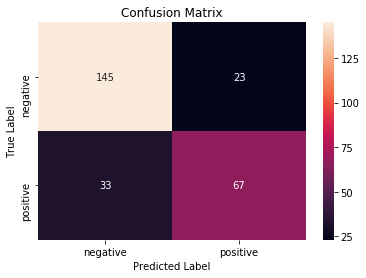

In [34]:

from sklearn.metrics import confusion_matrix
lr=LogisticRegression(penalty='l1',C=optimal_c)
lr.fit(X_tr,y_train)
predic=lr.predict(X_te)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()